# IRIS FLOWER CLASSIFICATION

# importing libraries


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
pip install opendatasets


     -------------------------------------- 63.3/63.3 kB 135.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=d9fbe37280173d840ed4a12909a3668e65570fee04f2d0b2b2415b426b98aa0a
  Stored in directory: c:\users\v bhavani prasad\appdata\local\pip\cache\wheels\92\8c\37\96a1971bedc1e74057af1e4852f18de7e8286dea4f12928e6c
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [14]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/saurabh00007/iriscsv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prasad1206
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 1.28k/1.28k [00:00<00:00, 204kB/s]

In [17]:
data=pd.read_csv('iris.csv')


In [18]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
data.shape

(150, 6)

In [21]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# missing values detection

In [24]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# counting the classes

In [25]:
data['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\Users\V BHAVANI PRASAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

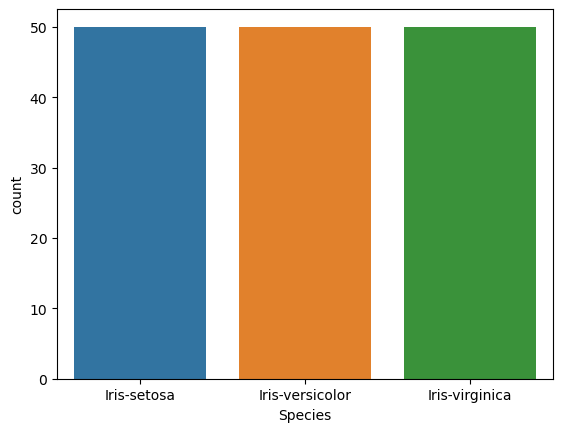

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['Species'])


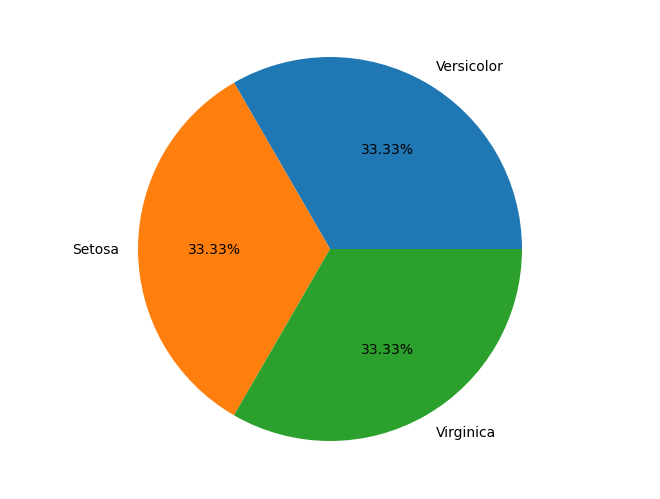

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [41]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Loading the models

In [42]:
x=data.drop(['Id','Species'],axis=1)
y=data['Species']

In [43]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


# Logistic Regression

In [46]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

model = LogisticRegression()
model.fit(x, y)
prediction = model.predict(x)
print('Accuracy:',metrics.accuracy_score(prediction,y))

Accuracy: 0.9733333333333334


# GaussionNB

In [50]:

#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x,y)
y_pred2 = model2.predict(x)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y,y_pred2))

Accuracy Score: 0.96


In [55]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','GaussianNB'],
    'Score': [0.973,0.960]})

result_df = results.sort_values(by='Score', ascending=False)
result_df

,Model,Score
0,Logistic Regression,0.973
1,GaussianNB,0.960


In [ ]:
Among two Logistic Resgressioin gives more Accuracy